# Continuous Wavelet Transform implemented with CUDA

## Imports

In [1]:
import importlib
import numpy as np
import pyqtgraph as pg
import scipy.datasets
import matplotlib.pyplot as plt

from audio_input import AudioInput

import wavelet
importlib.reload(wavelet)
from wavelet import PyWavelet
from wavelet import AntsWavelet
from wavelet import ShadeWavelet

## Configurations

In [2]:
# Size of audio samples frames processed by CWT
WINDOW_SIZE = 4096

# Number of samples to skip when plotting (inceasing this speeds up plotting)
DOWNSAMPLE_FACTOR = 1

FILE_PATH = "audio_files/c4_and_c7_4_arps.wav"

# Audio Input, Audio Characteristics 
audio_input = AudioInput(path = FILE_PATH, window_size = WINDOW_SIZE)
audio_data = audio_input.get_frame()
sample_rate = audio_input.get_sample_rate() # 44.1 kHz

## Wavelet Objects

In [ ]:
# PyWavelet
pywavelet = PyWavelet(sample_rate = sample_rate, 
                      window_size = WINDOW_SIZE,
                      downsample_factor = DOWNSAMPLE_FACTOR)

# TODO SOON wait why am I transposing this if it's being transposed in the compute_cwt method?
coefs_pywavelet = pywavelet.compute_cwt(audio_data)
coefs_pywavelet = np.transpose(coefs_pywavelet)

# AntsWavelet
ants_wavelet = AntsWavelet(sample_rate = sample_rate, 
                           window_size = WINDOW_SIZE,
                           downsample_factor = DOWNSAMPLE_FACTOR)

coefs_ants_wavelet = ants_wavelet.compute_cwt(audio_data)

# ShadeWavelet
shade_wavelet = ShadeWavelet(sample_rate = sample_rate, 
                             window_size = WINDOW_SIZE,
                             downsample_factor = DOWNSAMPLE_FACTOR)

coefs_shade_wavelet = shade_wavelet.compute_cwt(audio_data)

TypeError: The input array a must be a cupy.ndarray

## Plotting

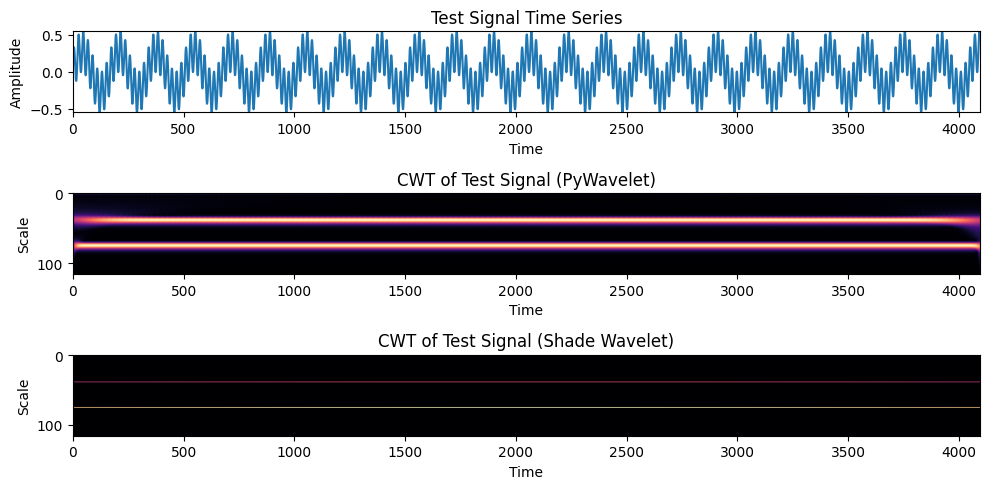

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10,5))

# TODO NEXT Fix the axes so they display freqs, not scales

axes[0].set_title("Test Signal Time Series")
axes[0].plot(audio_data)
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Amplitude")
axes[0].margins(x=0, y=0)

axes[1].set_title("PyWavelet CWT")
axes[1].imshow(coefs_pywavelet, cmap = "magma", aspect = "auto")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Scale")

axes[2].set_title("AntsWavelet CWT")
axes[2].imshow(coefs_ants_wavelet, cmap = "magma", aspect = "auto")
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Scale")

axes[3].set_title("ShadeWavelet CWT")
axes[3].imshow(coefs_shade_wavelet, cmap = "magma", aspect = "auto")
axes[3].set_xlabel("Time")
axes[3].set_ylabel("Scale")

plt.tight_layout()
plt.show()